**1. ĐỀ BÀI**

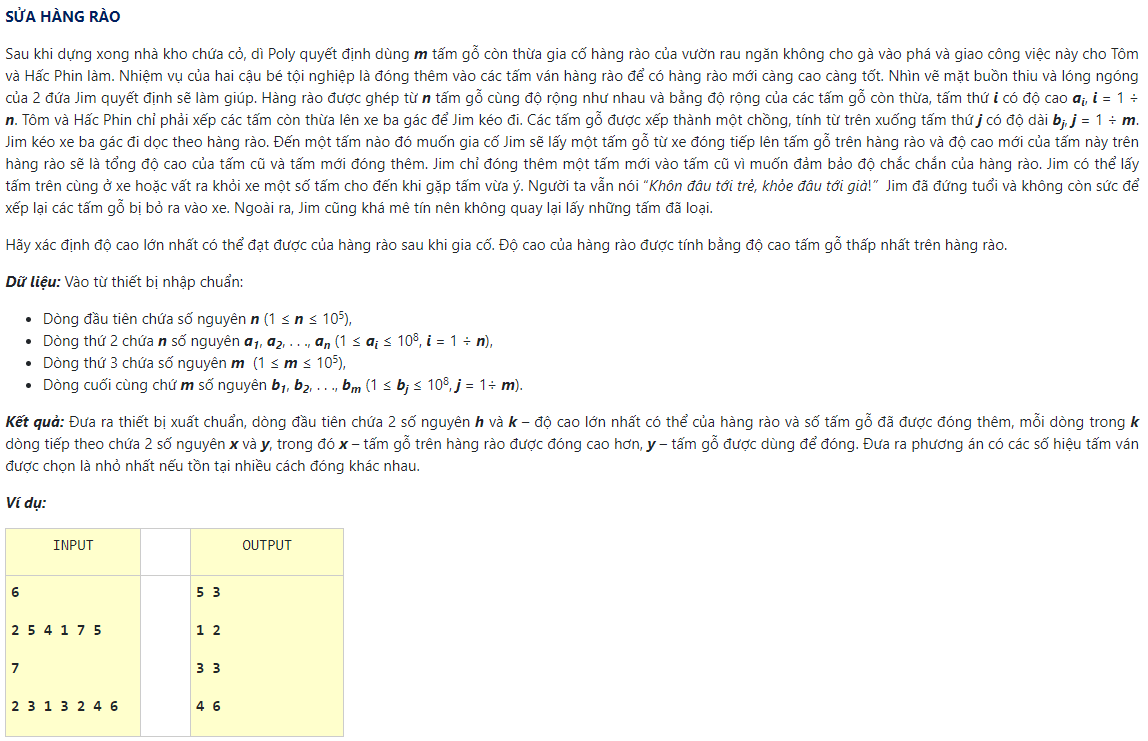

**2. ABSTRACTION (TRỪU TƯỢNG HÓA)**

+ Cho $m$ tấm ván thừa, tìm $h$(độ cao thấp nhất của hàng rào), $k$ tấm ván được đóng thêm, các tấm ván với độ cao $y$ thỏa điều kiện đóng trên $n$ các tấm gỗ được đóng sẵn (mỗi tấm gỗ trên hàng rào có độ cao $x$) 
+ Sao cho $h$ = $a[i]$ + $b[j]$ tìm được là lớn nhất với:

    + $a$ mảng chiều cao các tấm gỗ trên hàng rào
    + $b$ mảng chiều cao các tấm gỗ thừa
    + $h$ chiều cao lớn nhất nhận được
    + $i$: Đi từ $0$ đến $n$
    + $j$: Đi từ $0$ đến $n$ ($j$ chỉ đi qua $1$ lần)   

**3. PATTERN RECOGNIZATION (NHẬN DIỆN KHUÔN MẪU)**

+ Chiến lược áp dụng: nhánh cận, tìm kiếm nhị phân
+ Ý tưởng: đi sinh ra lần lượt mỗi trường hợp có thể. Nhưng trong quá trình xét, nếu kiểm định trường hợp đang sinh này không thể tốt hơn trường hợp tốt nhất trước đó, thì bỏ qua để giảm lượng tổ hợp dư thừa.
+ Độ phức tạp: O(n^2)

**4. ALGORITHM DESIGNED (THIẾT KẾ THUẬT TOÁN)**

**4.1 Phương pháp nhánh cận:**

+ Ta chọn trường hợp tốt nhất hiện tại là mảng $a$ (hàng rào chưa được sửa thêm)
+ Dùng đệ quy để sinh ra những trường hợp chọn tấm ván đóng thêm vào hàng rào:
  + trong quá trình xét, nếu chiều cao hàng đang đóng này không tốt hơn trường hợp trước đó, thì ta bỏ xét tiếp
  + nếu sau khi xét xong một trường, trường hợp này tốt hơn thì ta chọn là trường hợp tốt nhất

In [ ]:
n = int(input())
arr_n = [int(i) for i in input().split()]
m = int(input())
arr_m = [int(i) for i in input().split()]

best_queue_sum = arr_n.copy()
queue_summing = arr_n.copy()

best_queue_index = []
queue_index = []
count = 0
def go(index_n = 0, index_m = 0):
    global best_queue_sum, best_queue_index, count
    if index_n == n or index_m == m:
        count +=1
        if min(queue_summing) > min(best_queue_sum):
            best_queue_sum = queue_summing.copy()
            best_queue_index = queue_index.copy()
    else:
            if index_n != 0 and min(queue_summing[:index_n]) < min(best_queue_sum[:index_n]):
                pass 
            elif index_n!=0 and min(queue_summing[:index_n]) <= arr_n[index_n]:
                go(index_n+1, index_m)
            elif index_n==0 or index_n!=0 and min(queue_summing[:index_n]) > arr_n[index_n]:
                for j in range(index_m, m):
                    queue_summing[index_n] += arr_m[j]
                    queue_index.append([index_n, j])
                    go(index_n+1, j+1)
                    queue_summing[index_n] -= arr_m[j]
                    queue_index.pop()
                
go()
print(min(best_queue_sum), len(best_queue_index))
for x, y in best_queue_index:
    print(x+1, y+1)

6
2 5 4 1 7 5
7
2 3 1 3 2 4 6
5 3
1 2
3 3
4 6


**Kết quả sau khi submit:** lỗi thời gian
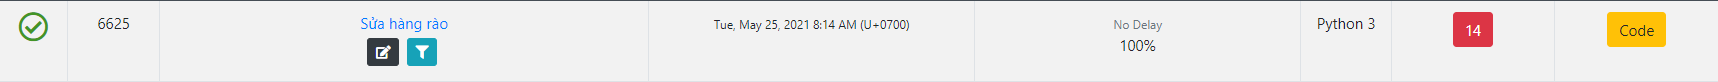

**4.2 Phương pháp tìm kiếm nhị phân**
+ Nhóm tiến hành cải tiến thuật toán thành **Tìm kiếm nhị phân** nhằm làm giảm độ phức tạp của vòng lặp tìm giá trị $h$

In [ ]:
n = int(input())
arr_n = [int(i) for i in input().split()]
m = int(input())
arr_m = [int(i) for i in input().split()]

def check_height(h):
    j = 0
    result = []
    for i in range(n):
        while (j < m and arr_n[i] + arr_m[j] < h):
            j += 1
        if arr_n[i] < h and j == m:
            return False, result
        if arr_n[i] < h:
            result.append((i + 1, j + 1))
            j += 1
    return True, result

def printResult(h, result):
    print(h, len(result))
    for i in result:
        print(i[0], i[1])

left, right = 0, int(2 * 1e8)
while right - left > 1:
    mid = (right + left) // 2
    check, result = check_height(mid)
    if check:
        left = mid
    else:
        right = mid

check, result = check_height(right - 1)
printResult(right - 1, result)

6
2 5 4 1 7 5
7
2 3 1 3 2 4 6
5 3
1 2
3 3
4 6


**Kết quả sau khi submit:**
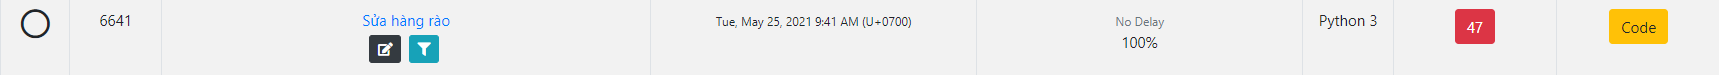

**4.3 Tham khảo phương pháp từ nhóm CS112.L21.N04**

- Bước 1: Gán $left = 0$, $right = 2 * 10^8$
- Bước 2: Trong khi $left - right >  1$:
  + Kiểm tra điều kiện $h = (left + right) \div 2$:
    + Gán $j = 0$ (Vị trí của tấm gỗ thừa cần xét)
    + Duyệt $a[i]$ với $a$ là mảng chiều cao tấm gỗ trên hàng rào, $i = 1 \rightarrow n$:
      + Trong khi $j < m$ và $a[i] + b[j] < h$ thì tăng $j$ lên 1
      + Nếu $a[i] < h$ và $j = m$ thì trả về $False$
      + Nếu $a[i] < h$:
        + Lưu $(i, j)$
        + Tăng $j$ lên 1
    + Trả về $True$
  + Nếu kiểm tra $h$ là $True$ thì lặp lại bước 2
  + Ngược lại, nếu kiểm tra $h$ là $False$ thì thực hiện bước 3
- Bước 3: Thực hiện lại hàm kiểm tra $h$ với $h = left$ để truy vết lại giá trị đã lưu và in kết quả

In [ ]:
from sys import stdin, stdout
n, wall, m, panel = int(stdin.readline()), list(map(int, stdin.readline().split())), int(stdin.readline()), list(map(int, stdin.readline().split()))
def ping_pong(min_height):
  u = 0
  for x in wall:
    if x < min_height:
      while (u < m) and (x + panel[u] < min_height):
        u += 1
      if u == m:
        return False
      u += 1
  return True
s_wall, s_panel = sorted(wall), sorted(panel)
low, high = s_wall[0], s_wall[-1] + s_panel[-1] + 1
if m >= n:
  low += s_panel[m - n]
else:
  high = min(s_wall[-1], min(s_wall[0] + s_panel[-1], s_wall[m - 1] + s_panel[0])) + 1
while high - low > 1:
  middle = low + (high - low) // 2
  if ping_pong(middle):
    low = middle
  else:
    high = middle
min_height, answer_list, u = low, list(), 0
for i, x in enumerate(wall, start=1):
  if x < min_height:
    while (u < m) and (x + panel[u] < min_height):
      u += 1
    u += 1
    answer_list.append((i, u))
stdout.write(str(min_height) + ' ' + str(len(answer_list)) + '\n')
for x in answer_list:
  stdout.write(str(x[0]) + ' ' + str(x[1]) + '\n')